In [ ]:
import os
os.getcwd()

'C:\\Users\\HP\\Deep Learning'

In [ ]:
os.getcwd()

'C:\\Users\\HP\\Deep Learning'

#Dataset

##Upload dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

## Unzipping dataset

In [ ]:
from zipfile import ZipFile
file_name = "/content/george_test_task.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

# Import Required Libraries


In [ ]:
#Import Libraries
import tensorflow as tf

#Linear Algebra
import numpy as np

#Data visualization
import matplotlib.pyplot as plt

#Manipulate Files
import os

#Manipulate Images
from PIL import Image

#ignores warnings
import warnings
warnings.filterwarnings('ignore')

print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.8.0


#Data preparation and preprocessing

##Train, Validation and Test Data preparation

In [ ]:
data_dir=r"C:\Users\HP\Downloads\OneDrive_2023-10-31\Data_Engineer_Test\george_test_task\george_test_task"
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5700 files belonging to 2 classes.
Using 4560 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5700 files belonging to 2 classes.
Using 1140 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5700 files belonging to 2 classes.
Using 1140 files for validation.


**No of classes present in the train data**

In [ ]:
class_names = train_ds.class_names
print(class_names)

['george', 'no_george']


**No of classes present in the validation data**

In [ ]:
class_names = val_ds.class_names
print(class_names)

['george', 'no_george']


**No of classes present in the test data**

In [ ]:
class_names = test_ds.class_names
print(class_names)

['george', 'no_george']


**Batch shape and Label shape**

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
class_names = train_ds.class_names
print(class_names)


['george', 'no_george']


#Data Visualaization

## Traing Data Visulaization

**Number of images present in the training dataset for each category**

In [ ]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)

train_label

array([1, 1, 0, ..., 1, 1, 0])

Text(0, 0.5, 'No of images')

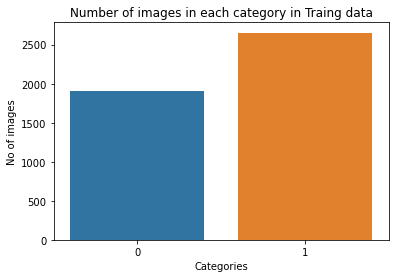

In [ ]:
import seaborn as sns
sns.countplot(x=train_label)
plt.title("Number of images in each category in Traing data")
plt.xlabel("Categories")
plt.ylabel("No of images")

**Number of images present in the testing dataset for each category**

In [ ]:
test_label = np.concatenate([y for x, y in test_ds], axis=0)

In [ ]:
test_label

array([1, 1, 1, ..., 1, 0, 1])

Text(0, 0.5, 'No of images')

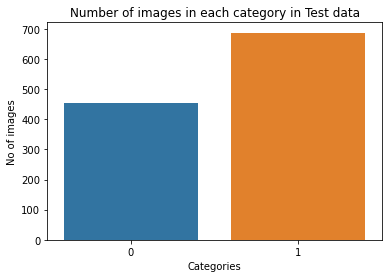

In [ ]:
sns.countplot(test_label)
plt.title("Number of images in each category in Test data")
plt.xlabel("Categories")
plt.ylabel("No of images")

<AxesSubplot:ylabel='Density'>

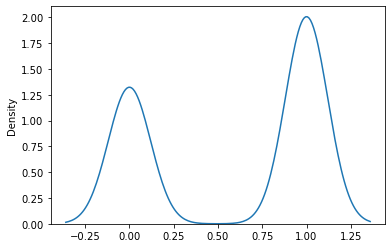

In [ ]:
sns.kdeplot(test_label)

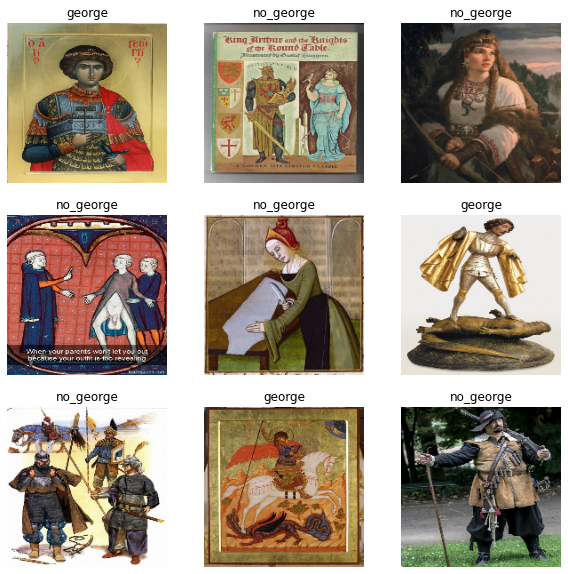

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Validation Data Visulaization

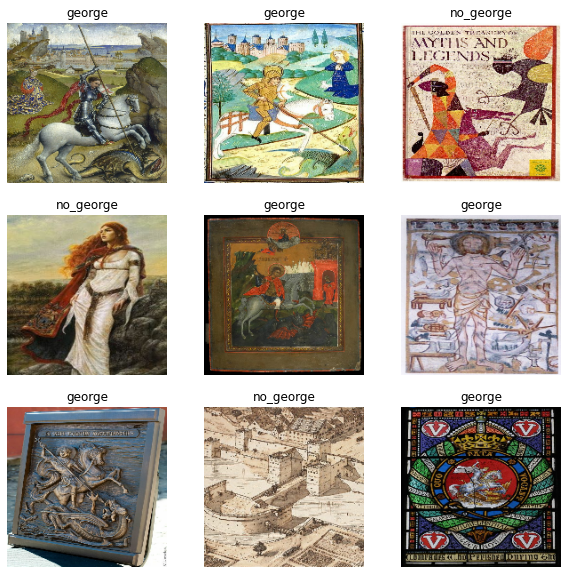

In [ ]:
#Visualize validation data


plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Testing Data Visulaization

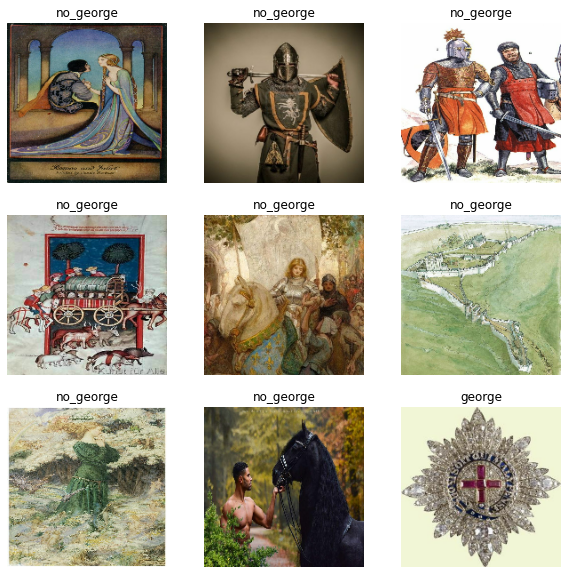

In [ ]:
#Visualize test data

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Model Building

We have used CNN model for training the data.The CNN (Convolutional Neural Network) model is one type of deep learning model that uses the concept of convolution. This model is most commonly applied to image analysis in machine learning.

CNNs are a powerful choice for tasks involving grid-like data, especially image analysis, because of their ability to automatically learn and extract meaningful features from the data, their computational efficiency, and their proven success in a wide range of applications. However, the choice of a specific model or architecture within the CNN family may vary depending on the task and dataset at hand.





In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN

model=Sequential();

# Step 1 - Convolution
#32--> no of filters, feature detector ki (row,col), (no of channels in rows, no of channels in cols, rgb->3/grey)
model.add(Conv2D(32,(3,3),input_shape=(180,180,3),activation='relu'))

# Step 2 - Pooling
#2 by 2 me max lena hi
model.add(MaxPooling2D(pool_size=(2,2)))

# Step 1 - Convolution
model.add(Conv2D(16,(3,3),activation='relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Step 3 - Flattening
model.add(Flatten())


# Step 4 - Full connection
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

# Compiling the CNN
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])


## Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29584)             0         
                                                                 
 dense (Dense)               (None, 128)               3

##Model training

In [ ]:
#CNN_Classifier.fit_generator(training_set,steps_per_epoch = 7000,epochs = 10,validation_data = test_set,validation_steps = 2000)

history=model.fit_generator(train_ds,steps_per_epoch = 10,epochs = 10,validation_data = val_ds,validation_steps = 2)
history

Epoch 1/10
10/10 [==============================] - 12s 1s/step - loss: 522.0936 - accuracy: 0.6250 - val_loss: 20.5053 - val_accuracy: 0.7188
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 4.9969 - accuracy: 0.5969 - val_loss: 1.3578 - val_accuracy: 0.6250
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 1.2077 - accuracy: 0.5312 - val_loss: 1.0811 - val_accuracy: 0.6406
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.8793 - accuracy: 0.5719 - val_loss: 0.7019 - val_accuracy: 0.5469
Epoch 5/10
10/10 [==============================] - 10s 988ms/step - loss: 0.7505 - accuracy: 0.6375 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 12s 1s/step - loss: 0.6777 - accuracy: 0.6000 - val_loss: 0.6690 - val_accuracy: 0.6250
Epoch 7/10
10/10 [==============================] - 13s 1s/step - loss: 0.7183 - accuracy: 0.5562 - val_loss: 0.6082 - val_accuracy: 0.6094
Epoch 8/10
10/

#Model Evaluation

In [ ]:
#with verbose
score = model.evaluate(test_ds, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.6493675112724304
accuracy= 0.6026315689086914


# Model prediction

**Model prediction on new image data**

In [ ]:
#Predict on new data
import numpy as np
from keras.preprocessing import image
test_img=image.load_img(r"C:\Users\HP\Downloads\OneDrive_2023-10-31\Data_Engineer_Test\george_test_task\george_test_.jpg", target_size=(180,180))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img, axis=0)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_img)
predictions

#training_set.class_indices
#print(predictions[0][0])
#print(predictions[0])

if predictions[0][0]==1:
    print('George is present')
else:
    print('George is not present')


George is present


#Visualizing training results


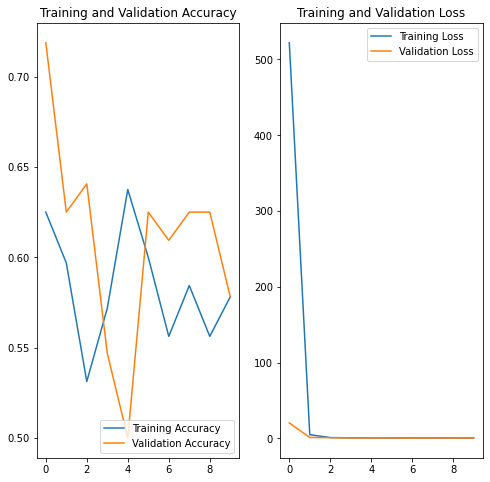

In [ ]:
#Visualize training results

epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()